# <center> 9. Закрепление знаний

In [9]:
import pandas as pd
import plotly.graph_objects as go
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
churn_data = pd.read_csv('C:\IDE\project_0.5\churn.csv')
churn_data.drop(['RowNumber'], axis=1, inplace=True)

## <center> ЗАДАНИЯ
    

9.1. Каково соотношение ушедших и лояльных клиентов? Покажите это на графике и дайте комментарий по соотношению.


In [21]:
fig1 = go.Figure(go.Pie(
    values = churn_data['Exited'].value_counts(),
    labels = ['Лояльные клиенты', 'Ушедшие клиенты'],
    pull = 0.1
))
fig1.update_layout(
    title = {
        'text': 'Соотношение ушедших и лояльных клиентов',
        'y': 0.9,
        'x': 0.45,
        'xanchor': 'center',
        'yanchor': 'top'
    },
    titlefont = {'size': 24, 'color': 'green'}
)
fig1.show()


![](fig1.png)

Выводы к заданию 9.1. На графике видно, что отток составляет пятую часть всех клиентов банка.

9.2. Постройте график, показывающий распределение баланса пользователей, у которых на счету больше 2 500 долларов. Опишите распределение и сделайте выводы.


In [11]:
fig2 = px.histogram(
    churn_data[churn_data['Balance']>2500],
    x = 'Balance',
    nbins = 20
)
fig2.update_layout(title="Распределение баланса клиентов с вкладами более 2500 долларов",
                  xaxis_title="Баланс на счетах клиентов",
                  yaxis_title="Кол-во клиентов")
fig2.show()

![](fig2.png)

Выводы к заданию 9.2. Основная масса клентов банка - с балансом на счетах от 40 до 200 тысяч долларов, а наибольшее количество - это пик графика от 100 до 140 тысяч долларов. Распределение можно считать нормальным, так как здесь явно определен пик в центре и симметричные боковые стороны. Максимальный баланс не превышает 260 тысяч долларов.

9.3. Посмотрите на распределение баланса клиента в разрезе признака оттока. Как различаются суммы на накопительном счёте ушедших и лояльных клиентов? Подумайте и напишите, с чем это может быть связано, что может не устраивать ушедших клиентов в банке.


In [12]:
fig3 = px.histogram(
    churn_data,
    x = 'Balance',
    color = churn_data['Exited'].map({0:'Лояльные', 1:'Ушедшие'}),
    labels = {'color': 'Лояльность банку'},
    nbins = 40
)
fig3.update_layout(title="Распределение балансов лояльных и ушедших клиентов",
                  xaxis_title="Баланс на счетах клиентов",
                  yaxis_title="Кол-во клиентов")
fig3.show()



![](fig3.png)

Выводы к заданию 9.3. Как видно из графика, основная часть ушедших клентов банка находится слева на гистограмме - с нулевым балансом на счетах (около 25% от всех ушедших клиентов). Остальная часть ушедших клиентов по отношению к лояльным распределена равномерно и без каких-либо значимых перекосов в соотношении, что видно на основном графике в центре. Можно предположить, что клиенты с нулевым балансом - это клиенты с кредитными продуктами банка, а ушедшие клиенты - это клиенты, которые единоразово воспользовались такой услугой и прекратили отношения с банком, что является вполне обычной формой таких отношений. Таким образом, по данной гистограмме тяжело понять, что может не устраивать ушедщих клиентов в банке, а банку лучше сделать упор на привлечение новых клиентов, сделав, например, упор на какие-нибудь бонусы для клиентов от кредитных продуктов.

9.4. Посмотрите на распределение возраста в разрезе признака оттока. В какой группе больше потенциальных выбросов? На какую возрастную категорию клиентов стоит обратить внимание банку?


In [13]:
fig4 = px.histogram(
    churn_data,
    x = 'Age',
    color = churn_data['Exited'].map({0:'Лояльные', 1:'Ушедшие'}),
    title = 'Количество клиентов банка в различных возрастных группах',
    height = 500,
    width = 1000,
    labels = {'color': 'Лояльность банку'},
    nbins = 10
)
fig4.update_layout(xaxis_title="Возраст клиентов",
                   yaxis_title="Кол-во клиентов")
fig4.show()

fig5 = px.box(
    churn_data,
    y = 'Exited',
    x = 'Age',
    orientation = 'h',
    height = 500,
    width = 1000,
    title = 'Распределение возрастав разрезе признака оттока',
    labels = {'Age':'Возраст клиентов','Exited':'Лояльные             Ушедшие', 'color': 'Лояльность банку'},
    color = churn_data['Exited'].map({0:'Лояльные', 1:'Ушедшие'})
)
fig5.show()

![](fig4.png)
![](fig5.png)

Выводы к заданию 9.4. Из первого графика видно, что пик лояльных клиентов приходится на возрастную группу от 30 до 39 лет. Максимальное же соотношение ушедших к лояльным находится в интервале 40 - 49 лет. Второй график рисует подобные же картины: лояльных от 31 до 41 года, ушедшие - от 38 до 51 года.  Именно на эти две возрастные категории ушедших и лояльных клиентов следует обратить внимание банку. Потенциальных выбросов больше в группе лояльных клиентов, это видно из второго графика: справа от кончика уса множество точек. Скорее всего это связано с тем что, лояльные клиенты смещены и сосредоточены в более молодом возрастном интервал, чем ушедшие.

9.5. Постройте график, который показывает взаимосвязь кредитного рейтинга клиента и его предполагаемой зарплаты. Добавьте расцветку по признаку оттока клиентов. Какова взаимосвязь между признаками? Если не видите явной взаимосвязи, укажите это.


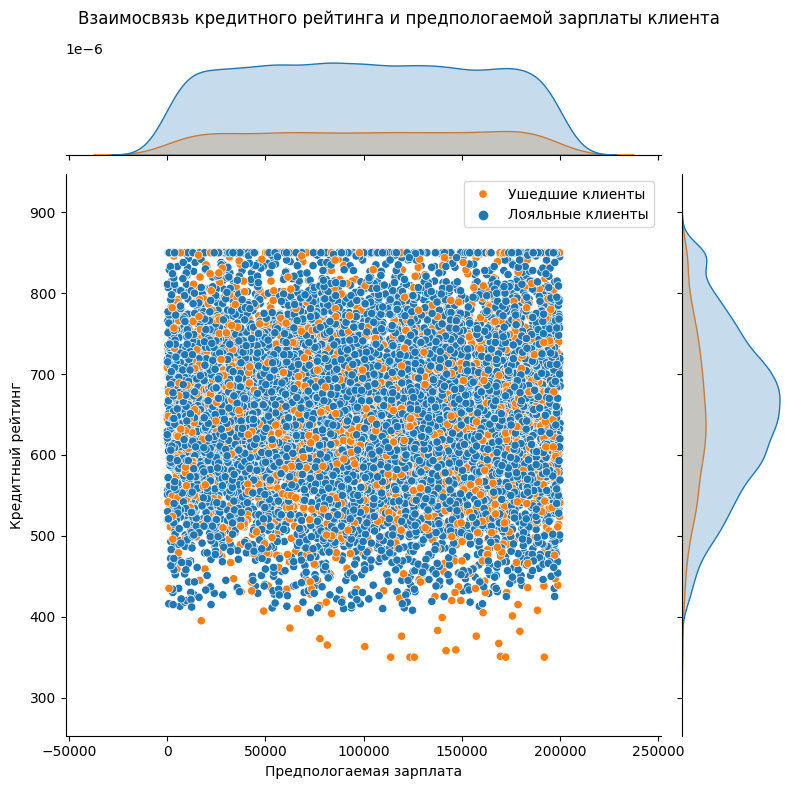

In [14]:
jointplot = sns.jointplot(
    data = churn_data,
    x = 'EstimatedSalary',
    y = 'CreditScore',
    hue = 'Exited',
    height = 8
)
ax = plt.gca()
ax.legend(["Ушедшие клиенты", "Лояльные клиенты"])

jointplot.set_axis_labels('Предпологаемая зарплата', 'Кредитный рейтинг')
jointplot.fig.suptitle('Взаимосвязь кредитного рейтинга и предпологаемой зарплаты клиента')
jointplot.fig.subplots_adjust(top=0.92)



Выводы к заданию 9.5. Из графика рассеяния видно, что небольшая часть ушедших клиентов выбивается из общей массы клиентов и находятся в нижней части, где у клиентов низкий кредитный рейтинг. Но их немного, и я думаю, можно не учитывать это при анализе графиков. При общем рассмотрении графиков рассеяния и гистограммы, прямой зависимости предпологаемой зарплаты от кредитного рейтинга в обеих группах (лояльные, ушедшие) не наблюдается.

9.6. Кто чаще уходит, мужчины или женщины? Постройте график, который иллюстрирует это.



In [15]:

fig6 = px.sunburst(
    churn_data, 
    path = [churn_data['Gender'].map({'Male':'Мужчина', 'Female':'Женщина'}),
           churn_data['Exited'].map({0:'Лояльные', 1:'Ушедшие'})] ,
    title = 'Соотношение клиентов банка: женщин и мужчин',
    width = 500
    )
fig6.update_traces(textinfo = "label + value + percent parent")


fig6.show()

![](fig6.png)

Выводы к заданию 9.6. Как видно из этой многоуровневой диаграммы, чаще клиентами банка перестают быть женщины.

9.7. Как отток клиентов зависит от числа приобретённых у банка услуг? Для ответа на этот вопрос постройте многоуровневую столбчатую диаграмму.

In [16]:
bar_data_1 = churn_data.groupby(
    by =['Exited', 'NumOfProducts'],
    as_index = False
)['CustomerId'].count()

bar_data_1['Exited'] = bar_data_1['Exited'].map({0:'Лояльные клиенты',1:'Ушедшие клиенты'})

fig7 = px.bar(
    data_frame = bar_data_1,
    x = 'CustomerId',
    y = 'NumOfProducts',
    color = 'Exited',
    text = 'CustomerId',
    height = 400,
    orientation = 'h',
    title = 'Зависимость оттока клиентов от числа приобретенных услуг',
    labels = {'NumOfProducts':'Кол-во продуктов банка', 'CustomerId':'Кол-во клиентов банка', 'Exited':'Лояльность банку'}
)
fig7.show()

![](fig7.png)

Выводы к заданию 9.7. Здесь видно довольно интересное соотношение оттока клиентов от количества услуг. Максимальное число ушедших клиентов составляют те, у кого услуга одна. Причем, корректно сравнивать этот показатель мы можем только с группой клиентов, у кого две услуги, так как общее количество клиентов и там и там сравнимо. А вот в группах клиентов с тремя и четырьмя услугами, при небольшом количестве клиентов в этих группах, относительный отток довольно высок. Таким образом, можно сделать вывод, что лучший показатель по лояльности - у клиентов с 2-мя услугами.

9.8. Как влияет наличие статуса активного клиента на отток клиентов? Постройте диаграмму, иллюстрирующую это. Что бы вы предложили банку, чтобы уменьшить отток клиентов среди неактивных?

In [17]:
fig8 = px.sunburst(
    churn_data, 
    path =[churn_data['IsActiveMember'].map({1:'Активные', 0:'Неактивные'}),
           churn_data['Exited'].map({0:'Лояльные', 1:'Ушедшие'})],
    title = 'Влияние статуса активного клиента на отток клиентов',
    width = 600
    )
fig8.update_traces(textinfo = "label + value + percent parent")


fig8.show()

![](fig8.png)

Выводы к заданию 9.8. Из диаграммы видно, что, практически, при равном распределении активных и неактивных клиентов, ушедших клиентов больше среди неактивных (27% против 14%). Соотвественно, можно предложить банку перевести неактивных клиентов в статус активных, предложив лучшие условия, либо какие-нибудь бонусы от своих продуктов.

9.9. В какой стране доля ушедших клиентов больше? Постройте тепловую картограмму, которая покажет это соотношение на карте мира. Предположите, с чем это может быть связано.

In [18]:
data_1 = churn_data.groupby(
    by = ['Geography'],
    as_index = False
)['Exited'].mean()

fig9 = px.choropleth(
    data_frame = data_1, 
    locations = "Geography", 
    locationmode = "country names", 
    color = 'Exited', 
    title = 'Доля ушедших клиентов на карте мира',
    width = 800, 
    height = 500, 
 )

fig9.update_geos(fitbounds = 'locations')
fig9.show()


![](fig9.png)

Выводы к заданию 9.9. Судя по тепловой картограмме ясно видно, что наибольшая доля ушедших клиентов в Германии. Я предположу, что этоможет быть связано с высоким уровнем конкуренции в банковской сфере в этой стране.

9.10. Переведите числовой признак CreditScore в категориальный. Для этого воспользуйтесь функцией get_credit_score_cat(), которая приведена ниже. Примените её к столбцу CreditScore и создайте новый признак CreditScoreCat — категории кредитного рейтинга.

Постройте сводную таблицу, строками которой являются категории кредитного рейтинга (CreditScoreCat), а столбцами — количество лет, в течение которых клиент пользуется услугами банка (Tenure). В ячейках сводной таблицы должно находиться среднее по признаку оттока (Exited) — доля ушедших пользователей.

На основе полученной сводной таблицы постройте тепловую карту с аннотацией. Найдите на тепловой карте категории клиентов, которые уходят чаще всего.

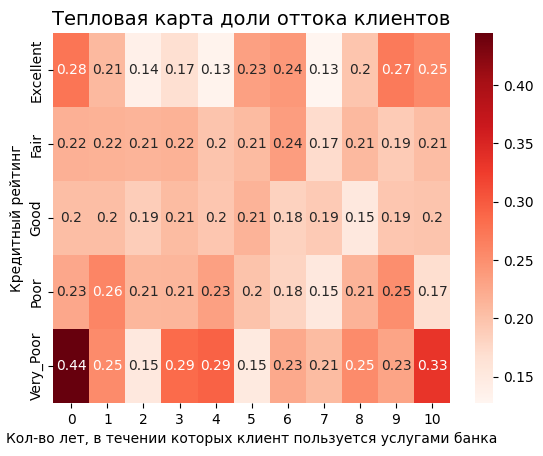

In [19]:
def get_credit_score_cat(credit_score):
    if credit_score >= 300 and credit_score < 500:
        return "Very_Poor"
    elif credit_score >= 500 and credit_score < 601:
        return "Poor"
    elif credit_score >= 601 and credit_score < 661:
        return "Fair"
    elif credit_score >= 661 and credit_score < 781:
        return "Good"
    elif credit_score >= 781 and credit_score < 851:
        return "Excellent"
    elif credit_score >= 851:
        return "Top"
    elif credit_score < 300:
        return "Deep"
    
churn_data['CreditScoreCat'] = churn_data['CreditScore'].apply(get_credit_score_cat).astype('category')
heat_map = churn_data.pivot_table(
    values = 'Exited',
    index = 'CreditScoreCat',
    columns = 'Tenure'
)

heatmap = sns.heatmap(heat_map, cmap='Reds', annot=True)
heatmap.set_title('Тепловая карта доли оттока клиентов', fontsize=14);
heatmap.set_xlabel("Кол-во лет, в течении которых клиент пользуется услугами банка")
heatmap.set_ylabel("Кредитный рейтинг");

Выводы к заданию 9.10. На данной тепловой карте сильно выделяется одна область с высокой долей оттока клиентов (44%) - с кредитным рейтингом Very_Poor и количеством лет, пользующихся услугами банка- 0.